In [3]:
import bs4
import requests

#Gå ind på Jobindex og søg på job til Datamatiker 
#Brug a beautiful soup til at finde hvor mange job der matcher din søgning

html = requests.get('https://www.jobindex.dk/jobsoegning?q=datamatiker')
soup = bs4.BeautifulSoup(html.text, 'html.parser')
h1 = soup.findAll('h1')
span = soup.find('span', {'class': 'd-none d-md-inline'})
amount_of_results = span.getText()
job_divs = soup.findAll('div', {'class': 'jobsearch-result'})

job_postings = []
job_atags = []
job_btags = []

for job in job_divs:
    job_postings.extend(job.findAll('p'))
for job in job_postings:
    job_atags.extend(job.findAll('a'))
for job in job_atags:
    job_btags.extend(job.findAll('b'))

#print(job_btags)
print(amount_of_results)
print('Heres a list of all the companies currently searching for employees (Only first page results)')
for job in job_btags:
    print(job.getText())


57 job matcher din søgning
Heres a list of all the companies currently searching for employees (Only first page results)
CSA CPH
Frontmatec
Aalborg Universitet
Telenor
Udviklings- og Forenklingsstyrelsen
Alm. Brand
Alm. Brand
Nykredit
Intermail Danmark A/S
Nomeco A/S
RelateIT A/S
Udviklings- og Forenklingsstyrelsen
RelateIT A/S
Bankdata
Special Minds
Arbejdernes Landsbank
Energinet
Udviklings- og Forenklingsstyrelsen
Udviklings- og Forenklingsstyrelsen
ConvaTec, Infusion Care


In [4]:
import bs4
import requests
import re

#Check hvor mange job der er tilbudt i de forskellige områder i landet

html = requests.get('https://www.jobindex.dk/jobsoegning?q=datamatiker')
soup = bs4.BeautifulSoup(html.text, 'html.parser')
areas = []
area_divs = soup.findAll('div', {'id': 'areas'})
area_a_tags = []

for area in area_divs:
    area_a_tags.extend(area.findAll('a'))

for area in area_a_tags:
    split_string = re.split('(\d+)',area.getText().strip())
    #print(split_string)
    areaInfo = [split_string[0],split_string[1]]
    areas.extend(areaInfo)

print(areas)




['Storkøbenhavn', '26', 'Nordsjælland', '3', 'Region Sjælland', '2', 'Fyn', '6', 'Region Nordjylland', '7', 'Region Midtjylland', '12', 'Sydjylland', '5', 'Bornholm', '0', 'Skåne', '0', 'Grønland', '0', 'Færøerne', '0', 'Udlandet', '1', 'Danmark', '57']


,Danmark,Storkøbenhavn,Region Midtjylland,Nordsjælland,Fyn,Sydjylland,Region Nordjylland,Udlandet,Region Sjælland,Skåne,Bornholm,Grønland,Færøerne
0,190,122,33,27,12,11,8,4,3,3,0,0,0


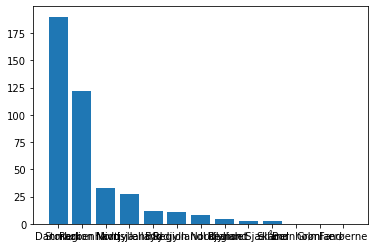

In [12]:
#I feltet søg efter job, søg på henholdsvis Python, Java og Javascript. - URLen skal gerne se sådan ud https://www.jobindex.dk/jobsoegning?q=python	
#Gør som før, find ud af hvor mange job der er, hvor i landet jobbene er tilbudt, og til sidst lav så en graf (i vælger selv hvad der giver mest mening), for hvor vi har bedst mulighed for at #finde job. 

import bs4
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt

def get_job_info(url):
    html = requests.get(url)
    soup = bs4.BeautifulSoup(html.text, 'html.parser')
    areas = {}
    area_divs = soup.findAll('div', {'id': 'areas'})
    area_a_tags = []

    for area in area_divs:
        area_a_tags.extend(area.findAll('a'))

    for area in area_a_tags:
        areas_kv = {}
        split_string = re.split('(\d+)',area.getText().strip())
        key = split_string[0]
        value = int(split_string[1])
        areas_kv = { key: value }
        areas.update(areas_kv)

    sort_amount_of_jobs = {k: v for k,v in sorted(areas.items(), reverse=True, key=lambda x: x[1])}
    plt.bar(sort_amount_of_jobs.keys(), sort_amount_of_jobs.values())
    py_df = pd.DataFrame(sort_amount_of_jobs, index=[0])
    display(py_df)

    return sort_amount_of_jobs

py_url = 'https://www.jobindex.dk/jobsoegning?q=python'
java_url = 'https://www.jobindex.dk/jobsoegning?q=java'
js_url = 'https://www.jobindex.dk/jobsoegning?q=javascript'


python = get_job_info(py_url)






,Danmark,Skåne,Storkøbenhavn,Region Midtjylland,Sydjylland,Region Nordjylland,Fyn,Nordsjælland,Udlandet,Region Sjælland,Grønland,Bornholm,Færøerne
0,139,136,85,18,13,12,9,8,3,1,1,0,0


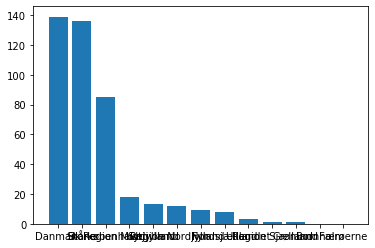

In [13]:
js = get_job_info(js_url)

,Danmark,Storkøbenhavn,Region Midtjylland,Nordsjælland,Sydjylland,Region Nordjylland,Region Sjælland,Fyn,Skåne,Udlandet,Bornholm,Grønland,Færøerne
0,116,72,19,11,8,6,5,4,3,2,0,0,0


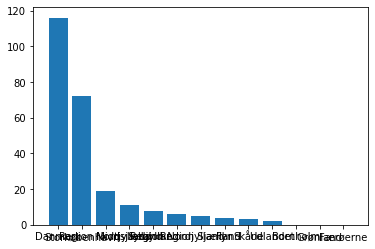

In [14]:
java = get_job_info(java_url)